# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [2]:
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'Reds'

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [3]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [4]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720496109664e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [5]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [6]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.561318e-09
b1 max relative error: 8.372502e-10
W2 max relative error: 3.440708e-09
b2 max relative error: 4.447646e-11


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.017149607938732093


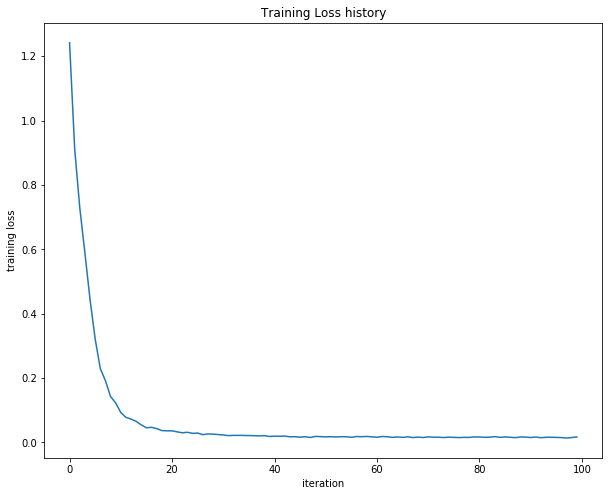

In [7]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [8]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [9]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 1000: loss 2.302954
iteration 100 / 1000: loss 2.302550
iteration 200 / 1000: loss 2.297648
iteration 300 / 1000: loss 2.259602
iteration 400 / 1000: loss 2.204170
iteration 500 / 1000: loss 2.118565
iteration 600 / 1000: loss 2.051535
iteration 700 / 1000: loss 1.988466
iteration 800 / 1000: loss 2.006591
iteration 900 / 1000: loss 1.951473
Validation accuracy:  0.287


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

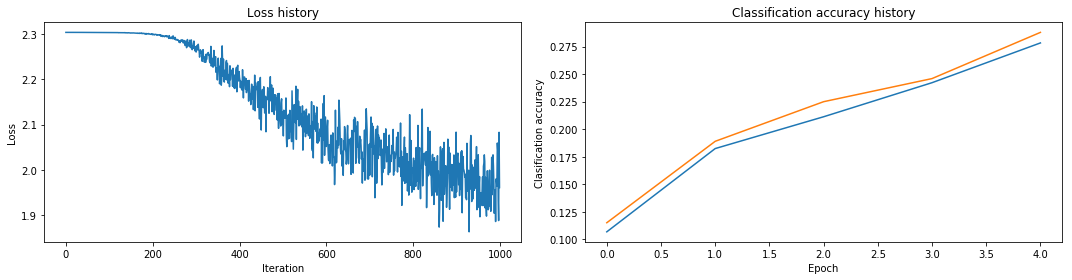

In [10]:
net.history()

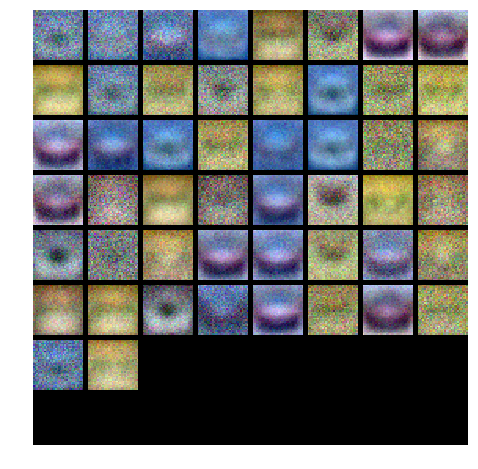

In [11]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [14]:
input_size = 32 * 32 * 3
num_classes = 10 

best_val = -1
best_net = None # store the best model into this 

# tune learning rate and decay rate
n_params = 20
hidden_layer_sizes = [50]*n_params
regularization_strengths = [0.25]*n_params
learning_rates = np.power(10, np.random.uniform(-4,-2.25, size=n_params))
decay_rates = np.random.uniform(0.75, 0.95, size=n_params)
params = [(hidden_layer_sizes[i], regularization_strengths[i], learning_rates[i], decay_rates[i]) for i in range(n_params)]
results = {}

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
for hidden_size, reg, rate, decay_rate in params:
    net = TwoLayerNet(input_size, hidden_size, num_classes)
    stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1225, batch_size=200,
            learning_rate=rate, learning_rate_decay=decay_rate,
            reg=reg, verbose=False)
    training_accuracy = stats['train_acc_history'][-1]
    val_accuracy = stats['val_acc_history'][-1]
    results[(hidden_size,reg,rate,decay_rate)] = (training_accuracy, val_accuracy)
    if val_accuracy > best_val:
        best_val = val_accuracy
        best_net = net
    print('hidden %d lr %e dr %f reg %e train accuracy: %f val accuracy: %f' % (
                hidden_size, rate, decay_rate, reg, training_accuracy, val_accuracy))

print('best validation accuracy achieved during cross-validation: %f' % best_val)
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

hidden 50 lr 1.043520e-03 dr 0.807328 reg 2.500000e-01 train accuracy: 0.472612 val accuracy: 0.450000
hidden 50 lr 3.279863e-04 dr 0.910790 reg 2.500000e-01 train accuracy: 0.400000 val accuracy: 0.406000
hidden 50 lr 1.436464e-04 dr 0.866479 reg 2.500000e-01 train accuracy: 0.304184 val accuracy: 0.295000
hidden 50 lr 1.988119e-04 dr 0.792757 reg 2.500000e-01 train accuracy: 0.316122 val accuracy: 0.307000
hidden 50 lr 2.033693e-04 dr 0.874199 reg 2.500000e-01 train accuracy: 0.351041 val accuracy: 0.355000
hidden 50 lr 3.228297e-04 dr 0.867755 reg 2.500000e-01 train accuracy: 0.390531 val accuracy: 0.390000
hidden 50 lr 9.070970e-04 dr 0.795632 reg 2.500000e-01 train accuracy: 0.459061 val accuracy: 0.445000
hidden 50 lr 2.700310e-04 dr 0.949993 reg 2.500000e-01 train accuracy: 0.388653 val accuracy: 0.398000
hidden 50 lr 1.427751e-03 dr 0.920207 reg 2.500000e-01 train accuracy: 0.488224 val accuracy: 0.459000
hidden 50 lr 9.870953e-04 dr 0.830832 reg 2.500000e-01 train accuracy: 0.

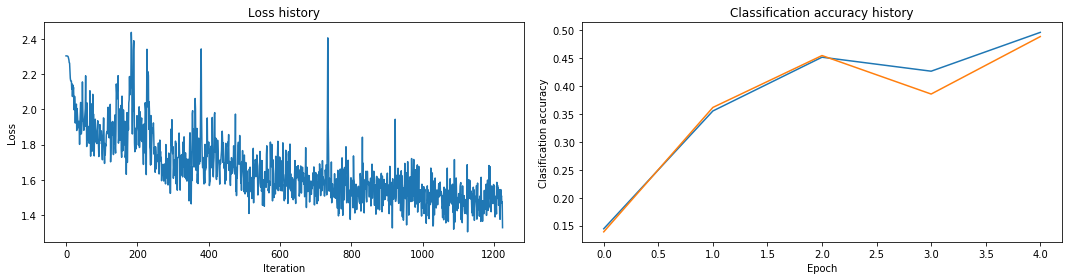

In [13]:
best_net.history()

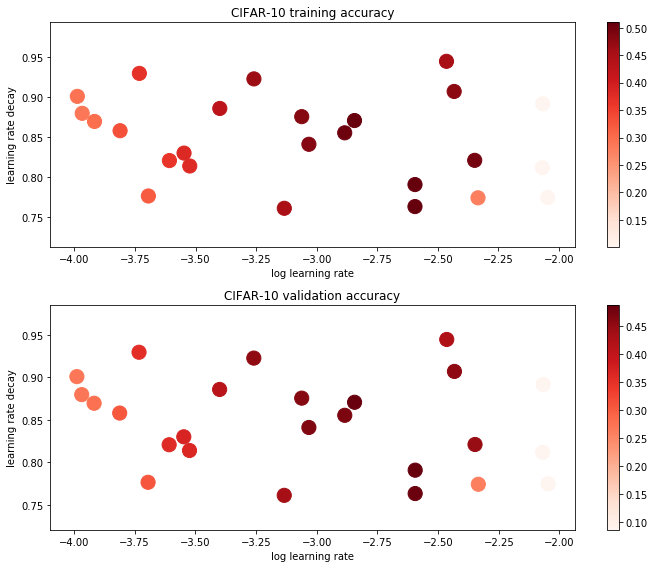

In [78]:
# Visualize the cross-validation results
import math
x_scatter = [math.log10(x[2]) for x in results] # rate
y_scatter = [x[3] for x in results] # decay rate

# plot training accuracy
marker_size = 200
colors = [results[x][0] for x in results]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('learning rate decay')
plt.title('CIFAR-10 training accuracy')
plt.tight_layout() # tight layout

# plot validation accuracy
colors = [results[x][1] for x in results] # default size of markers is 20
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('learning rate decay')
plt.title('CIFAR-10 validation accuracy')
plt.tight_layout() # tight layout
plt.show()

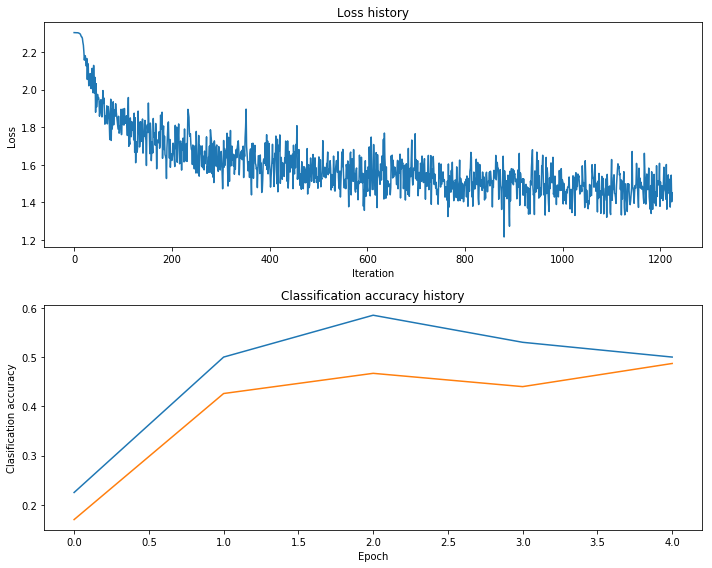

In [79]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(best_stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.tight_layout() # tight layout

plt.subplot(2, 1, 2)
plt.plot(best_stats['train_acc_history'], label='train')
plt.plot(best_stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.tight_layout() # tight layout
plt.show()

In [80]:
# tune learning rate and decay rate
n_params = 25
hidden_layer_sizes = np.random.randint(25, 150, size=n_params)
regularization_strengths = np.power(10, np.random.uniform(-3.5,0, size=n_params))
learning_rates = [2.5e-3]*n_params
decay_rates = [0.8]*n_params
params = [(hidden_layer_sizes[i], regularization_strengths[i], learning_rates[i], decay_rates[i])
          for i in range(n_params)]
results = {}

for hidden_size, reg, rate, decay_rate in params:
    net = TwoLayerNet(input_size, hidden_size, num_classes)
    stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1225, batch_size=200,
            learning_rate=rate, learning_rate_decay=decay_rate,
            reg=reg, verbose=False)
    y_train_label = net.predict(X_train)
    training_accuracy = np.mean(y_train == y_train_label)
    val_accuracy = stats['val_acc_history'][-1]
    results[(hidden_size,reg,rate,decay_rate)] = (training_accuracy, val_accuracy)
    if val_accuracy > best_val:
        best_val = val_accuracy
        best_net = net
        best_stats = stats
    print('hidden %d lr %e dr %f reg %e train accuracy: %f val accuracy: %f' % (
                hidden_size, rate, decay_rate, reg, training_accuracy, val_accuracy))

print('best validation accuracy achieved during cross-validation: %f' % best_val)

hidden 111 lr 2.500000e-03 dr 0.800000 reg 1.282453e-01 train accuracy: 0.548551 val accuracy: 0.477000
hidden 42 lr 2.500000e-03 dr 0.800000 reg 6.687944e-01 train accuracy: 0.491816 val accuracy: 0.460000
hidden 101 lr 2.500000e-03 dr 0.800000 reg 9.267321e-03 train accuracy: 0.553490 val accuracy: 0.496000
hidden 44 lr 2.500000e-03 dr 0.800000 reg 1.788325e-02 train accuracy: 0.517367 val accuracy: 0.475000
hidden 84 lr 2.500000e-03 dr 0.800000 reg 7.010716e-03 train accuracy: 0.537388 val accuracy: 0.488000
hidden 136 lr 2.500000e-03 dr 0.800000 reg 3.289932e-01 train accuracy: 0.538612 val accuracy: 0.506000
hidden 80 lr 2.500000e-03 dr 0.800000 reg 6.953956e-01 train accuracy: 0.504224 val accuracy: 0.468000
hidden 93 lr 2.500000e-03 dr 0.800000 reg 1.383047e-01 train accuracy: 0.536184 val accuracy: 0.518000
hidden 121 lr 2.500000e-03 dr 0.800000 reg 2.141181e-01 train accuracy: 0.536816 val accuracy: 0.477000
hidden 92 lr 2.500000e-03 dr 0.800000 reg 6.674515e-03 train accuracy

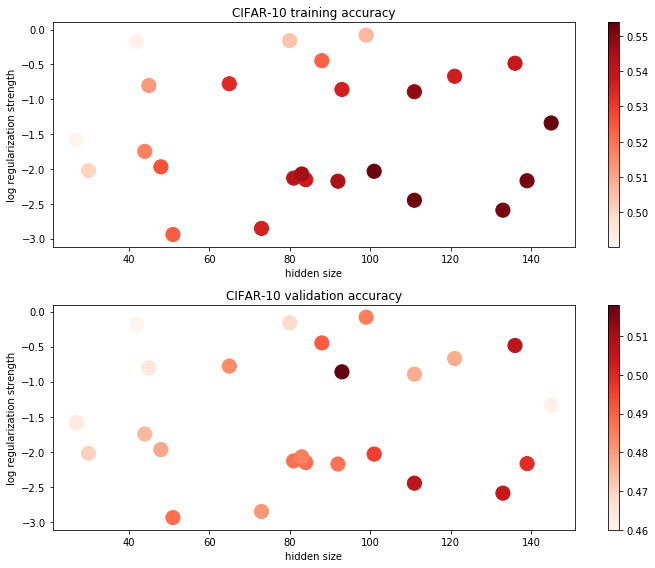

In [81]:
# Visualize the cross-validation results
import math
x_scatter = [x[0] for x in results] # hidden size
y_scatter = [math.log10(x[1]) for x in results] # reg

# plot training accuracy
marker_size = 200
colors = [results[x][0] for x in results]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('hidden size')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 training accuracy')
plt.tight_layout() # tight layout

# plot validation accuracy
colors = [results[x][1] for x in results] # default size of markers is 20
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('hidden size')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 validation accuracy')
plt.tight_layout() # tight layout
plt.show()

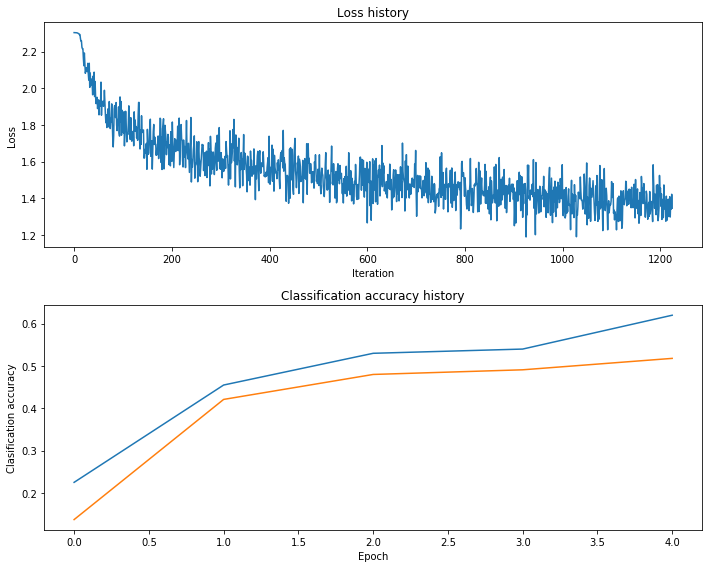

In [83]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(best_stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.tight_layout() # tight layout

plt.subplot(2, 1, 2)
plt.plot(best_stats['train_acc_history'], label='train')
plt.plot(best_stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.tight_layout() # tight layout
plt.show()

In [89]:
n_params = 20
hidden_layer_sizes = np.random.randint(80, 120, size=n_params)
regularization_strengths = np.power(10, np.random.uniform(-3.5,-0.5, size=n_params))
learning_rates = np.power(10, np.random.uniform(-3,-2.5, size=n_params))
decay_rates = np.random.uniform(0.75, 0.95, size=n_params)
params = [(hidden_layer_sizes[i], regularization_strengths[i], learning_rates[i], decay_rates[i]) for i in range(n_params)]
results_tune = {}

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
for hidden_size, reg, rate, decay_rate in params:
    net = TwoLayerNet(input_size, hidden_size, num_classes)
    stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=2450, batch_size=200,
            learning_rate=rate, learning_rate_decay=decay_rate,
            reg=reg, verbose=False)
    y_train_label = net.predict(X_train)
    training_accuracy = np.mean(y_train == y_train_label)
    val_accuracy = stats['val_acc_history'][-1]
    results_tune[(hidden_size,reg,rate,decay_rate)] = (training_accuracy, val_accuracy)
    if val_accuracy > best_val:
        best_val = val_accuracy
        best_net = net
        best_stats = stats
    print('hidden %d lr %e dr %f reg %e train accuracy: %f val accuracy: %f' % (
                hidden_size, rate, decay_rate, reg, training_accuracy, val_accuracy))

print('best validation accuracy achieved during cross-validation: %f' % best_val)

hidden 98 lr 1.007040e-03 dr 0.758290 reg 5.107241e-03 train accuracy: 0.515878 val accuracy: 0.481000
hidden 100 lr 1.634939e-03 dr 0.925307 reg 4.663281e-03 train accuracy: 0.600490 val accuracy: 0.521000
hidden 87 lr 2.026280e-03 dr 0.838751 reg 1.776586e-02 train accuracy: 0.596000 val accuracy: 0.499000
hidden 100 lr 1.973307e-03 dr 0.784717 reg 1.222811e-02 train accuracy: 0.583959 val accuracy: 0.528000
hidden 119 lr 8.845996e-04 dr 0.831060 reg 1.337968e-01 train accuracy: 0.534796 val accuracy: 0.493000
hidden 119 lr 2.483279e-03 dr 0.769789 reg 1.064961e-01 train accuracy: 0.591184 val accuracy: 0.521000
hidden 94 lr 9.042321e-04 dr 0.834082 reg 5.392846e-03 train accuracy: 0.536469 val accuracy: 0.490000
hidden 106 lr 9.553317e-04 dr 0.752568 reg 2.617879e-01 train accuracy: 0.500286 val accuracy: 0.482000
hidden 92 lr 1.223779e-03 dr 0.804744 reg 9.497165e-04 train accuracy: 0.548592 val accuracy: 0.498000
hidden 89 lr 8.038959e-04 dr 0.916161 reg 3.122112e-01 train accurac

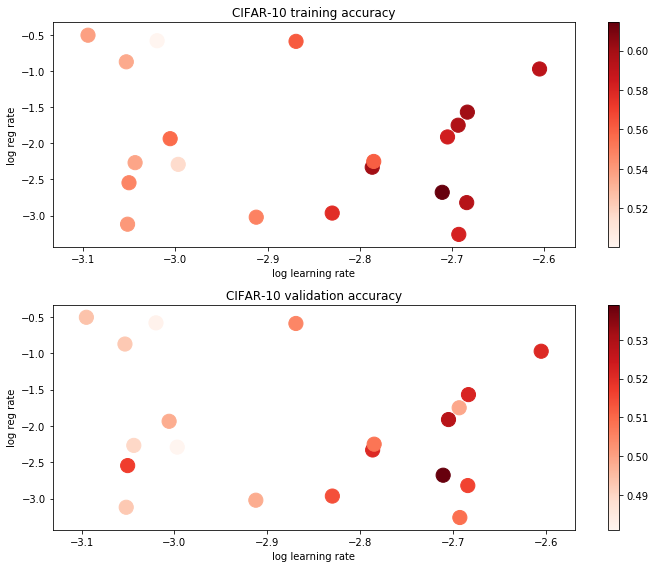

In [90]:
# Visualize the cross-validation results
import math
x_scatter = [math.log10(x[2]) for x in results_tune] # rate
y_scatter = [math.log10(x[1]) for x in results_tune] # reg

# plot training accuracy
marker_size = 200
colors = [results_tune[x][0] for x in results_tune]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log reg rate')
plt.title('CIFAR-10 training accuracy')
plt.tight_layout() # tight layout

# plot validation accuracy
colors = [results_tune[x][1] for x in results_tune] # default size of markers is 20
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log reg rate')
plt.title('CIFAR-10 validation accuracy')
plt.tight_layout() # tight layout
plt.show()

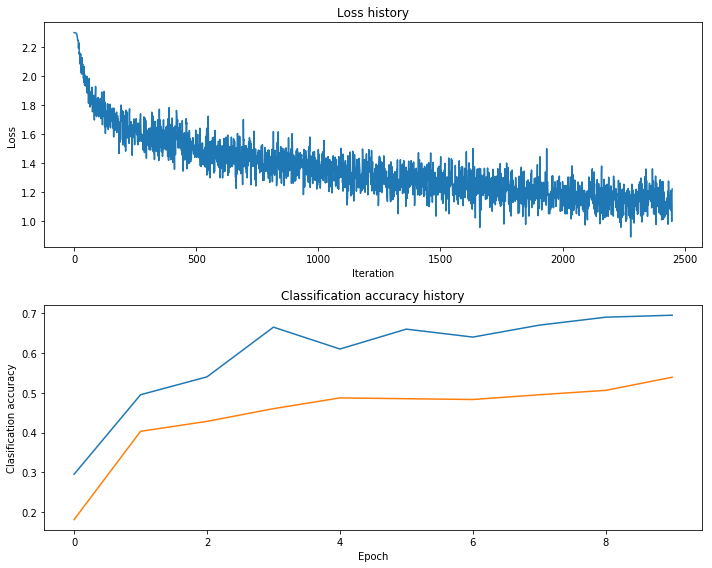

In [91]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(best_stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.tight_layout() # tight layout

plt.subplot(2, 1, 2)
plt.plot(best_stats['train_acc_history'], label='train')
plt.plot(best_stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.tight_layout() # tight layout
plt.show()

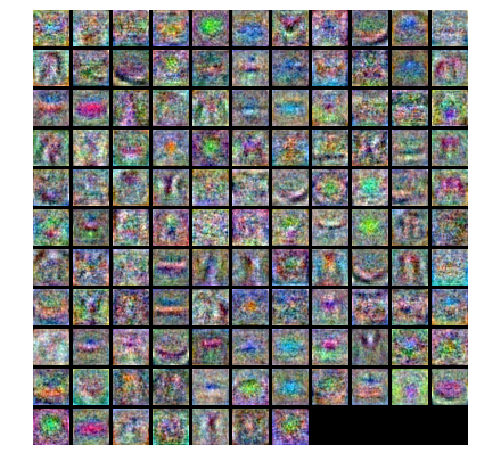

In [92]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [93]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.514
